In [71]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df_avocado = pd.read_csv('avocado.csv')

In [73]:
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [74]:
df_avocado.rename(columns={'Total Volume': 'TotalVolume'}, inplace=True)

## Drills

### Choose one variable and plot that variable four different ways.

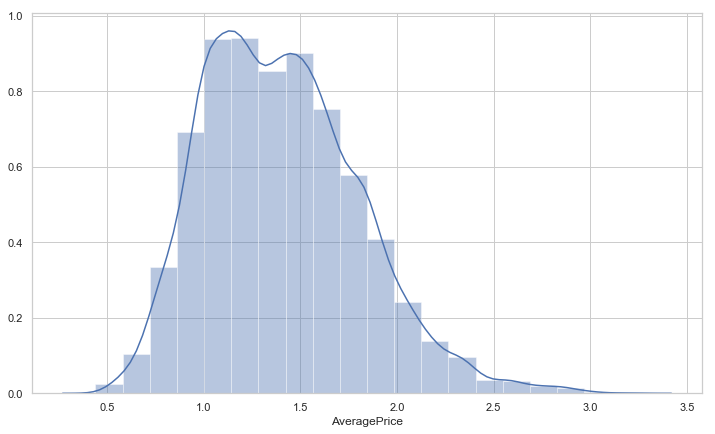

In [75]:
#histogram on average price
plt.figure(figsize=(12,7))
sns.distplot(df_avocado["AveragePrice"], bins=20)
plt.show()

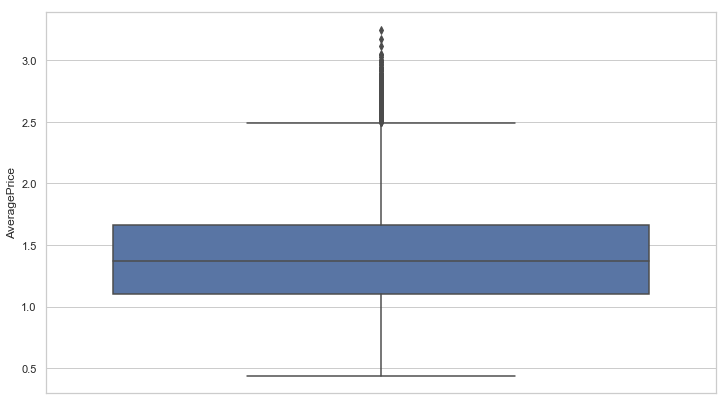

In [76]:
# box plot on average price
plt.figure(figsize=(12,7))
sns.boxplot(y="AveragePrice", data=df_avocado)
plt.show()

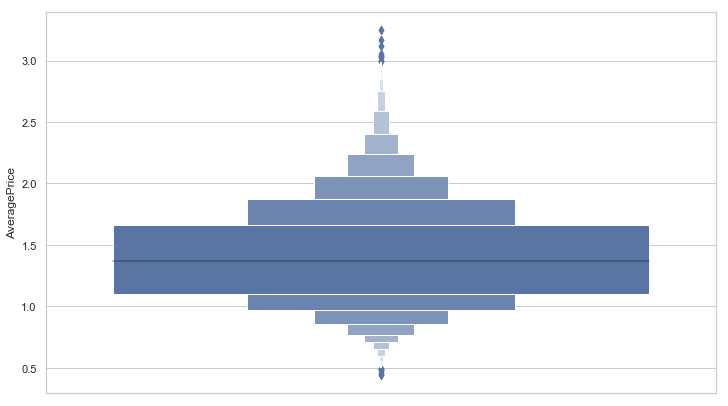

In [77]:
plt.figure(figsize=(12,7))
sns.boxenplot(y="AveragePrice", data=df_avocado)
plt.show()

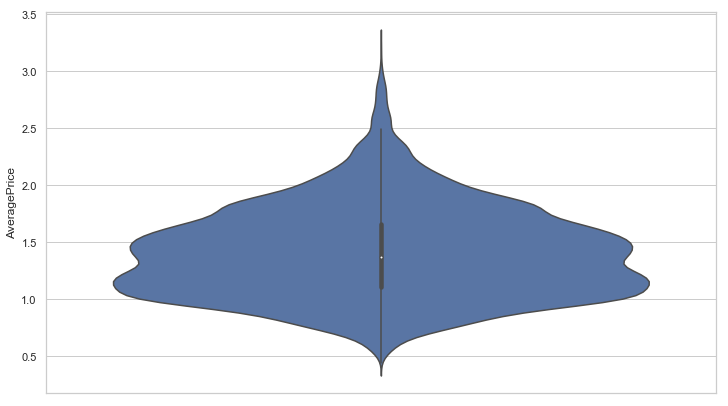

In [78]:
plt.figure(figsize=(12,7))
sns.violinplot(y="AveragePrice", data=df_avocado)
plt.show()

### Choose two continuous variables, and plot them three different ways.

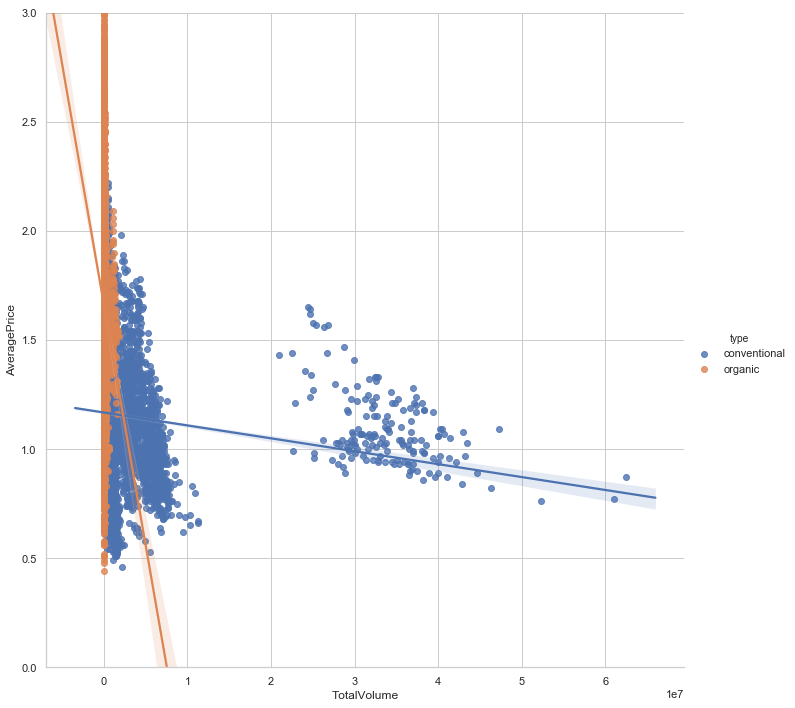

In [79]:
sns.set(style="whitegrid")
sns.lmplot(x="TotalVolume", y="AveragePrice", hue="type", data=df_avocado,
          height=10)
plt.ylim(0, 3)
plt.show()

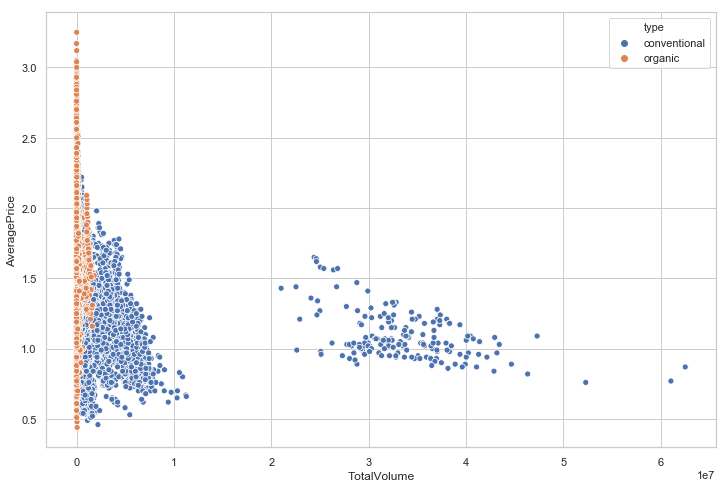

In [80]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="TotalVolume", y="AveragePrice", hue='type',data=df_avocado)
plt.show()

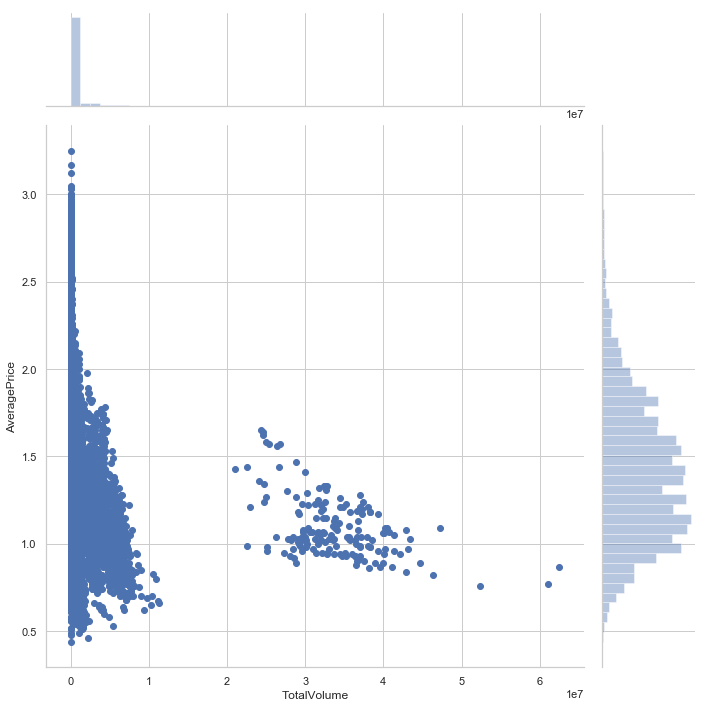

In [81]:
sns.jointplot(x="TotalVolume", y="AveragePrice", data=df_avocado,
             height=10)
plt.show()

### Choose one continuous variable and one categorical variable, and plot them six different ways.

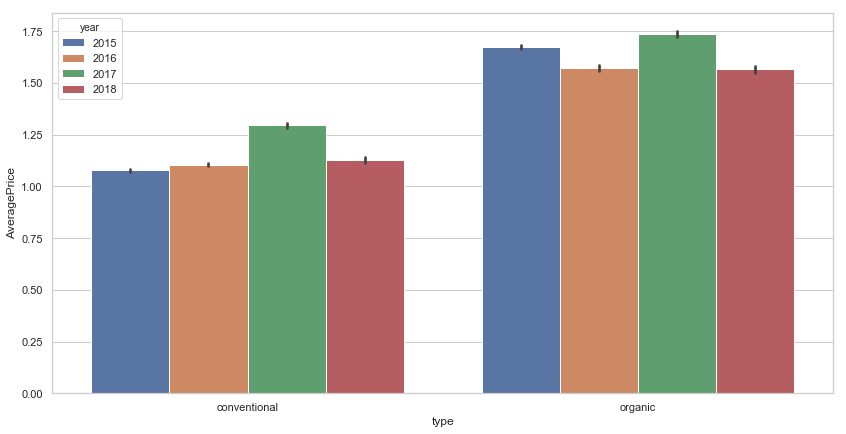

In [82]:
# add a bar chart
plt.figure(figsize=(14,7))
sns.barplot(x="type", y="AveragePrice", hue='year',data=df_avocado)
plt.show()

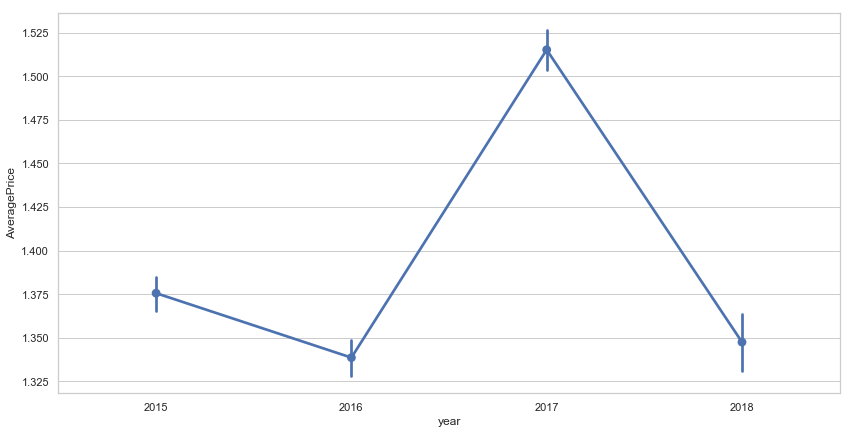

In [83]:
plt.figure(figsize=(14,7))
sns.pointplot(x='year', y="AveragePrice", data=df_avocado)
plt.show()

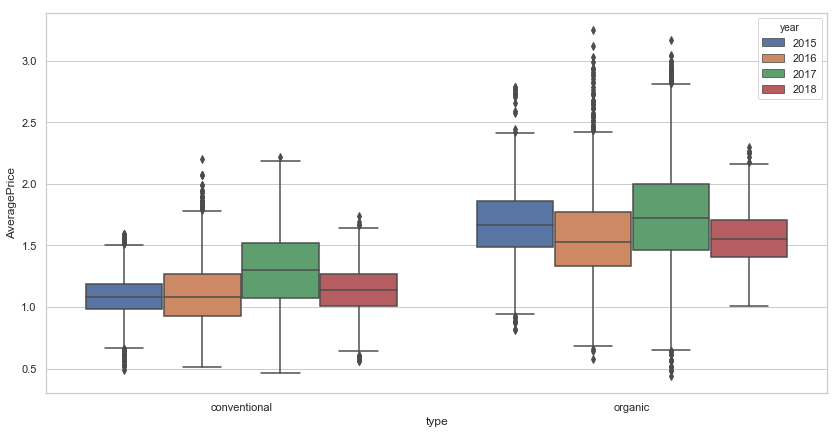

In [84]:
plt.figure(figsize=(14,7))
sns.boxplot(x="type", y="AveragePrice", hue='year',data=df_avocado)
#plt.title('Plot 2: Price differences by year for conventional and organic avocadoes')
plt.show()

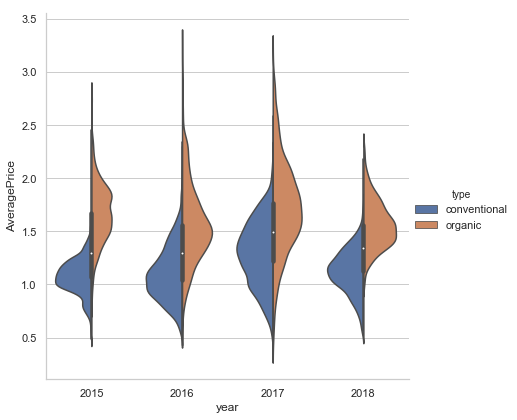

In [85]:
sns.catplot(x="year", y="AveragePrice", hue="type", kind='violin',
            split=True, data=df_avocado, height=6, )
#plt.title('Plot 3: Price differences by year for conventional and organic avocadoes')
plt.show()

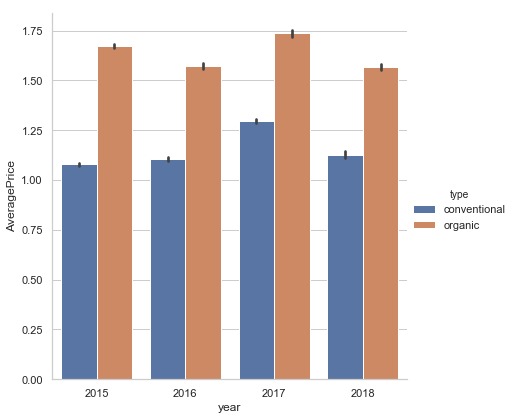

In [86]:
sns.catplot(x="year", y="AveragePrice", hue="type", kind='bar',
            data=df_avocado, height=6)
plt.show()

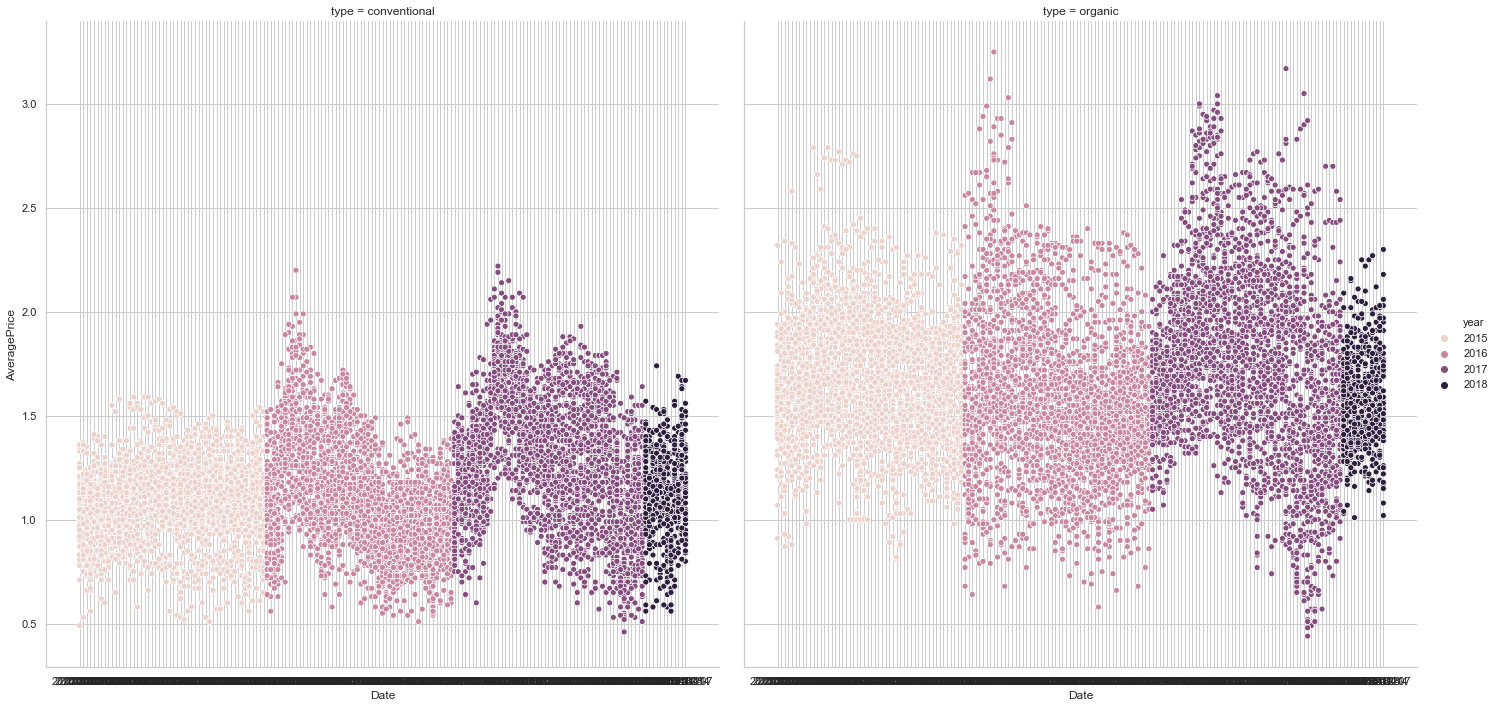

In [87]:
sns.relplot(x="Date", y="AveragePrice", col="type", hue="year",
            data=df_avocado, height=10)
plt.show()

## Challenge

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    
    Probability distributions
    Bivariate relationships
    Whether the distributions or the relationships vary across groups

#### Probability distributions

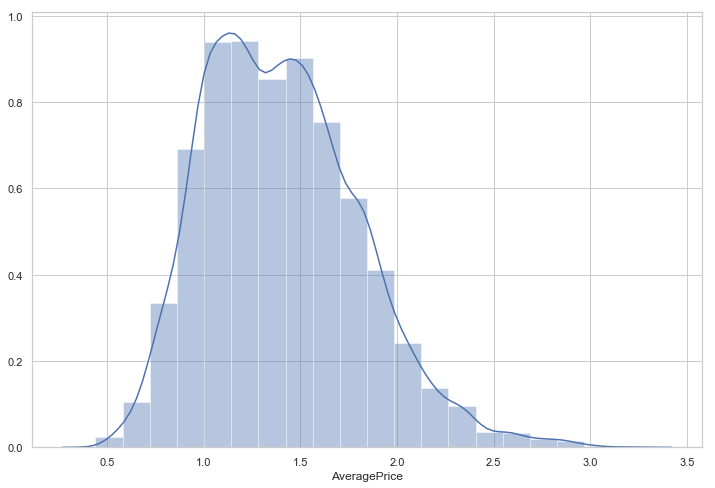

In [88]:
plt.figure(figsize=(12,8))
sns.distplot(df_avocado['AveragePrice'], bins=20)
plt.show()

#### Bivariate relationships

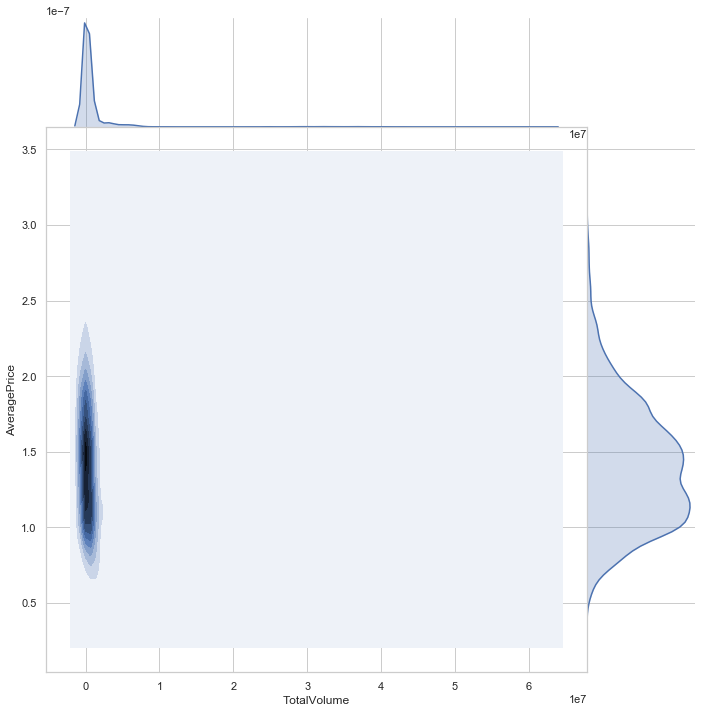

In [90]:
a = sns.jointplot(x="TotalVolume", y='AveragePrice', data=df_avocado, kind="kde", height=10, space=0)
plt.show()

#### Whether the distributions or the relationships vary across groups

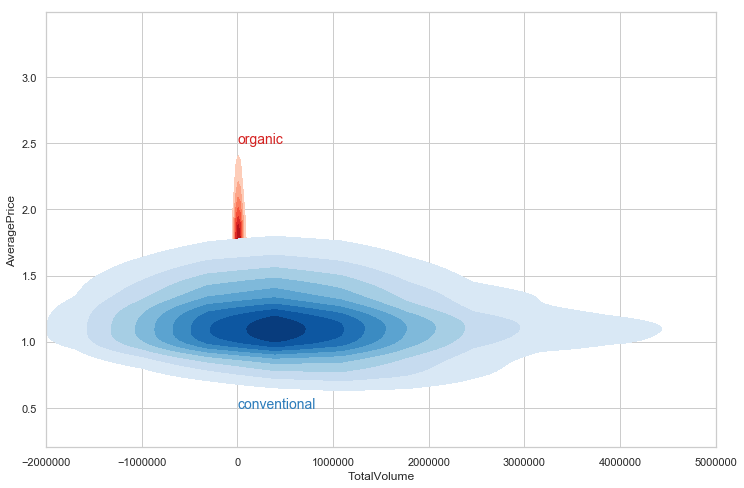

In [106]:
organic = df_avocado.query("type == 'organic'")
conventional = df_avocado.query("type == 'conventional'")

plt.figure(figsize=(12,8))
# ax = plt.subplots()
ax.set_aspect("equal")

ax = sns.kdeplot(organic.TotalVolume, organic.AveragePrice, 
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(conventional.TotalVolume, conventional.AveragePrice,
                 cmap="Blues", shade=True, shade_lowest=False)
ax.set_xlim(left=-2000000,right=5000000)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(0, 2.5, "organic", size=14, color=red)
ax.text(0, 0.5, "conventional", size=14, color=blue)

plt.show()